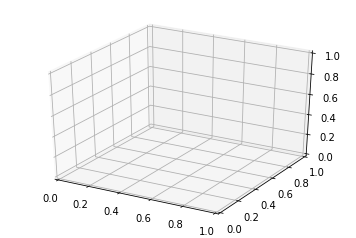

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')


import distribution2D as d2

tensor([[ 5.6052e-45,  7.7492e-43,  7.9099e-41,  ...,  6.2836e-39,
          7.9099e-41,  7.7492e-43],
        [ 7.7492e-43,  1.0156e-40,  1.0360e-38,  ...,  8.2298e-37,
          1.0360e-38,  1.0156e-40],
        [ 7.9099e-41,  1.0360e-38,  1.0567e-36,  ...,  8.3947e-35,
          1.0567e-36,  1.0360e-38],
        ...,
        [ 6.2836e-39,  8.2298e-37,  8.3947e-35,  ...,  6.6687e-33,
          8.3947e-35,  8.2298e-37],
        [ 7.9099e-41,  1.0360e-38,  1.0567e-36,  ...,  8.3947e-35,
          1.0567e-36,  1.0360e-38],
        [ 7.7492e-43,  1.0156e-40,  1.0360e-38,  ...,  8.2298e-37,
          1.0360e-38,  1.0156e-40]])


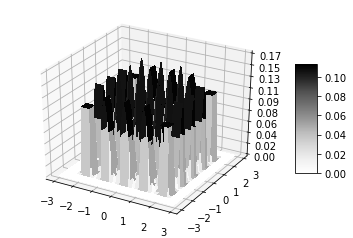

<Figure size 432x288 with 0 Axes>

In [5]:
X = np.arange(-3, 3, 0.1)
Y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(X, Y)

import torch

x = torch.Tensor(X)
y = torch.Tensor(Y)

plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()


points = torch.zeros(int(6/0.1)**2, 2)

for i in range(60):
    for j in range(60):
        points[60*i + j, 0] = x[i, j]
        points[60*i + j, 1] = y[i, j]

        
z = d2.columnVals(points).view(60, 60)
Z = z.numpy()

print(z)
surf = ax.plot_surface(X, Y, Z, cmap=cm.Greys,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, np.max(Z) + 0.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


fig.colorbar(surf, shrink=0.5, aspect=5)

fig

In [1]:
from realModelDeep import *

In [17]:
model = torch.load('deepWeights/epoch239100')

In [18]:
_, lz = model(points.cuda())

In [19]:
Z = torch.exp(lz).cpu().view(60, 60).detach().numpy()

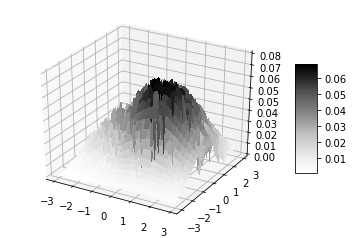

<Figure size 432x288 with 0 Axes>

In [20]:
plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()

surf = ax.plot_surface(X, Y, Z, cmap=cm.Greys,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, np.max(Z) + 0.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


fig.colorbar(surf, shrink=0.5, aspect=5)

fig